In [1]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
# importing the dataset
df = pd.read_csv('Advertising.csv')
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [3]:
# let's see the 1st ten data points
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
# checking the data types
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [5]:
# checking for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
# checking the shape
df.shape

(200, 5)

In [7]:
# statistical description
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
# correlation
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

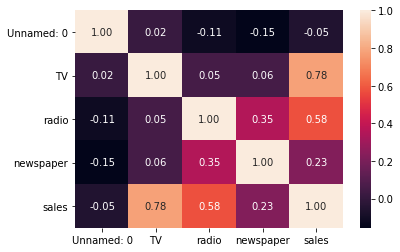

In [9]:
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

<AxesSubplot:xlabel='sales', ylabel='TV'>

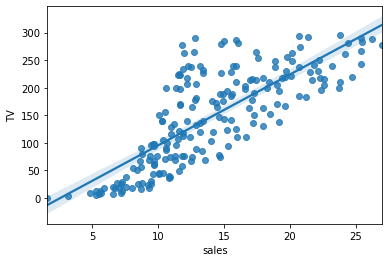

In [10]:
# let's examine the relationship between the dependent and independent variables
sns.regplot(x='sales', y='TV', data=df)

<AxesSubplot:xlabel='sales', ylabel='radio'>

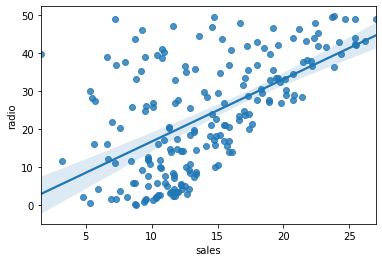

In [11]:
sns.regplot(x='sales', y='radio', data=df)

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

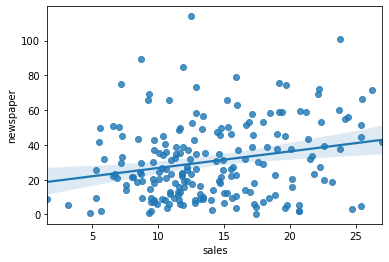

In [12]:
sns.regplot(x='sales', y='newspaper', data=df)

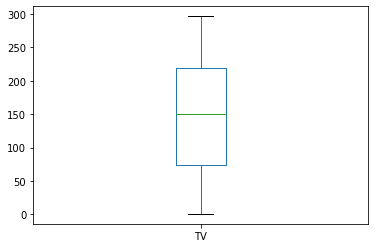

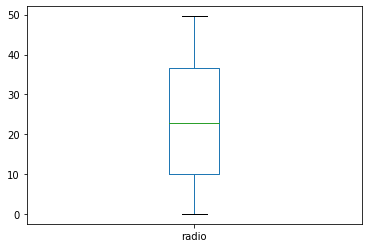

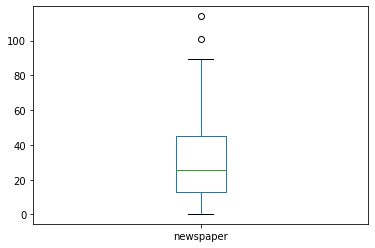

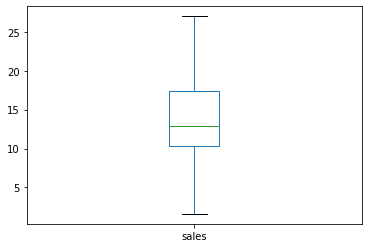

In [13]:
# Now let's check for outliers
for i in df.columns[1:]:
    plt.figure(i)
    df[i].plot.box()

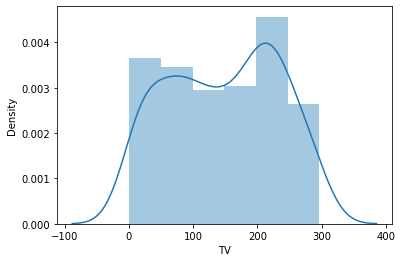

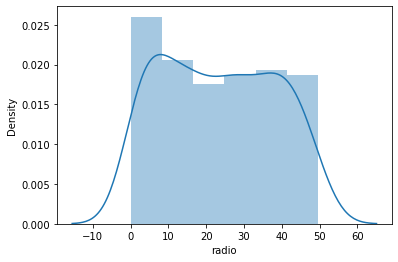

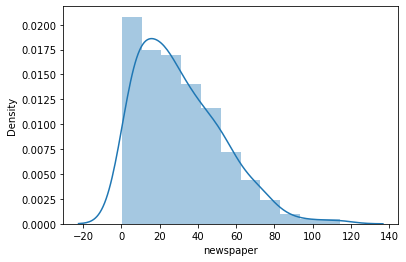

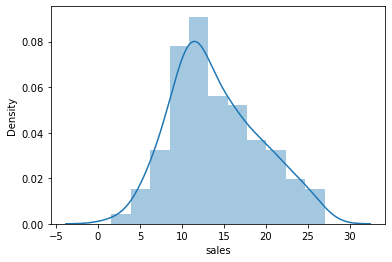

In [14]:
# Now lets check the distribution of the various features
for i in df.columns[1:]:
    plt.figure(i)
    sns.distplot(df[i],kde=True)

In [15]:
# Now let's check for skewness
df.skew().sort_values()

TV           -0.069853
Unnamed: 0    0.000000
radio         0.094175
sales         0.407571
newspaper     0.894720
dtype: float64

### Data Cleaning and Preprocessing

In [64]:
df2 = df.copy()

In [19]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='box-cox', standardize=True)
power2 = PowerTransformer(standardize=True)

In [20]:
power.fit_transform(df2['TV'].to_numpy().reshape(-1, 1))

array([[ 0.94725135],
       [-1.18915505],
       [-1.65248661],
       [ 0.14442365],
       [ 0.45459495],
       [-1.83433789],
       [-0.99900155],
       [-0.20577958],
       [-1.83671136],
       [ 0.6483455 ],
       [-0.87972165],
       [ 0.79677355],
       [-1.52856407],
       [-0.47558208],
       [ 0.6914819 ],
       [ 0.60394238],
       [-0.85665964],
       [ 1.42998299],
       [-0.83778591],
       [ 0.09867196],
       [ 0.83318933],
       [ 1.01761387],
       [-1.73394915],
       [ 0.92980844],
       [-0.93186864],
       [ 1.25891988],
       [ 0.05035737],
       [ 1.04348792],
       [ 1.12632525],
       [-0.81901627],
       [ 1.5347668 ],
       [-0.29088917],
       [-0.47925593],
       [ 1.28408605],
       [-0.49767197],
       [ 1.51480948],
       [ 1.29617813],
       [-0.76462262],
       [-1.21048311],
       [ 0.92689764],
       [ 0.67546044],
       [ 0.41519038],
       [ 1.54110825],
       [ 0.71943713],
       [-1.50533722],
       [ 0

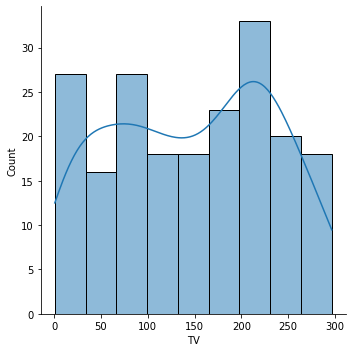

In [21]:
sns.displot(df2['TV'],kde=True)

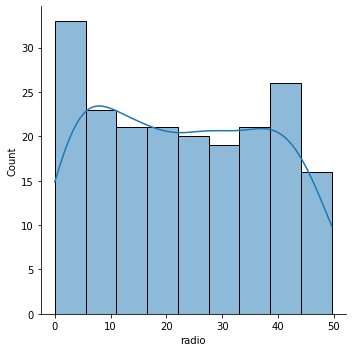

In [22]:
power2.fit_transform(df2['radio'].to_numpy().reshape(-1, 1))
sns.displot(df2['radio'],kde=True)

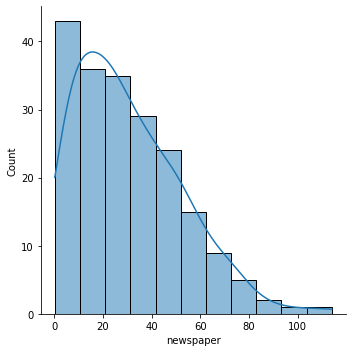

In [23]:
power.fit_transform(df2['newspaper'].to_numpy().reshape(-1, 1))
sns.displot(df2['newspaper'],kde=True)

In [24]:
# separating features
x = df2.drop('sales', axis=1)
y = df2['sales']

In [165]:
# Normalization
lr = LinearRegression()

In [166]:
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}")
    print('\n')

At random state 0, the training accuracy is: 0.9073274552252846
At random state 0, the testing accuracy is: 0.856480214327925


At random state 1, the training accuracy is: 0.8959391993971187
At random state 1, the testing accuracy is: 0.8928781912093182


At random state 2, the training accuracy is: 0.9152614531156523
At random state 2, the testing accuracy is: 0.7570326409482366


At random state 3, the training accuracy is: 0.8931443451313652
At random state 3, the testing accuracy is: 0.9134449674582059


At random state 4, the training accuracy is: 0.8911682084041699
At random state 4, the testing accuracy is: 0.9084934434517352


At random state 5, the training accuracy is: 0.89570620107301
At random state 5, the testing accuracy is: 0.8985195836305799


At random state 6, the training accuracy is: 0.8915582028345674
At random state 6, the testing accuracy is: 0.9219412229135809


At random state 7, the training accuracy is: 0.8929171093102488
At random state 7, the testing accur

At random state 80, the training accuracy is: 0.9169729628077916
At random state 80, the testing accuracy is: 0.8002879936768352


At random state 81, the training accuracy is: 0.9035712487248864
At random state 81, the testing accuracy is: 0.8609698767855936


At random state 82, the training accuracy is: 0.9154275126468338
At random state 82, the testing accuracy is: 0.8013214526563002


At random state 83, the training accuracy is: 0.8842230653829803
At random state 83, the testing accuracy is: 0.936533183297641


At random state 84, the training accuracy is: 0.8954723130793452
At random state 84, the testing accuracy is: 0.8982625547501828


At random state 85, the training accuracy is: 0.9086556153894079
At random state 85, the testing accuracy is: 0.8439750044569613


At random state 86, the training accuracy is: 0.8941933141983467
At random state 86, the testing accuracy is: 0.9101136416354886


At random state 87, the training accuracy is: 0.9120854281966964
At random state 87,

In [167]:
pred_test = lr.predict(x_test)

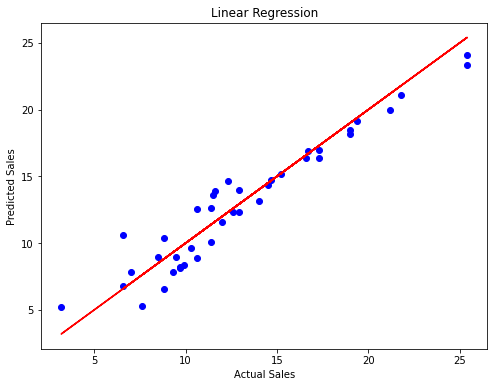

In [168]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='b')
plt.plot(y_test,y_test, color='r')
plt.title('Linear Regression')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=98)

In [109]:
#Create a function within many Machine Learning Models
def models(x_train,y_train):
  
    #Using Linear Regression Algorithm to the Training Set
    from sklearn.linear_model import LinearRegression
    log = LinearRegression()
    log.fit(x_train, y_train)

    #Using AdaBoostRegressor 
    from sklearn.ensemble import AdaBoostRegressor
    adb = AdaBoostRegressor()
    adb.fit(x_train, y_train)

    #Using KNNieghborsRegressor Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor()
    knr.fit(x_train, y_train)

    # Gradient Boost Regressor
    from sklearn.ensemble import GradientBoostingRegressor
    gbr = GradientBoostingRegressor()
    gbr.fit(x_train, y_train)

    # Using Gaussian Regressor method of naïve_bayes class to use Naïve Bayes Algorithm
    from sklearn.gaussian_process import GaussianProcessRegressor
    gauss = GaussianProcessRegressor()
    gauss.fit(x_train, y_train)

    #Using DecisionTreeRegressor of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeRegressor
    tree = DecisionTreeRegressor()
    tree.fit(x_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor()
    forest.fit(x_train, y_train)

    #print model accuracy on the training data.
    print('[0]Linear Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]AdaBoost Regressor Training Accuracy:', adb.score(x_train, y_train))
    print('[2]KNieghborsRegressor Training Accuracy:', knr.score(x_train, y_train))
    print('[3]Gradient Boosting Regressor Training Accuracy:', gbr.score(x_train, y_train))
    print('[4]Gaussian Regressor Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Regressor Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Regressor Training Accuracy:', forest.score(x_train, y_train))

    return log, adb, knr, gbr, gauss, tree, forest

In [110]:
model = models(x_train,y_train)

[0]Linear Regression Training Accuracy: 0.8820113423343214
[1]AdaBoost Regressor Training Accuracy: 0.9767583895192811
[2]KNieghborsRegressor Training Accuracy: 0.8338955462097075
[3]Gradient Boosting Regressor Training Accuracy: 0.9988735418414443
[4]Gaussian Regressor Training Accuracy: 1.0
[5]Decision Tree Regressor Training Accuracy: 1.0
[6]Random Forest Regressor Training Accuracy: 0.9963181793849663


In [108]:
print(adb.score(x_test,y_test))

0.9710014050769117


In [115]:
for i in range(len(model)):
    cm = model[i].score(x_test,y_test)
    
    print('Model[{}] Testing Accuracy = "{} !"'.format(i, cm))
    print()

Model[0] Testing Accuracy = "0.9393724951506759 !"

Model[1] Testing Accuracy = "0.9661424847959871 !"

Model[2] Testing Accuracy = "0.8044549588838099 !"

Model[3] Testing Accuracy = "0.9795207705371635 !"

Model[4] Testing Accuracy = "-5.66856762803777 !"

Model[5] Testing Accuracy = "0.9624280576064222 !"

Model[6] Testing Accuracy = "0.980201760309677 !"



In [158]:
# Regularization Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mae', 'poisson'],
             'n_estimators':list(range(10,100)),
             'max_features':['auto', 'sqrt', 'log2']}
rfr = RandomForestRegressor()
clf = GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 93}


In [159]:
rfr = RandomForestRegressor(criterion='mae',max_features='auto', n_estimators=93)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_dec = rfr.predict(x_test)

rfs = r2_score(y_test, pred_dec)
print(rfs*100)

rfscore = cross_val_score(rfr,x,y,cv=5)
rfc = rfscore.mean()
print(rfc*100)

98.11156466200191
97.17888671395205


In [127]:
# Regularization Linear Regression
from sklearn.linear_model import LinearRegression
parameters = {'fit_intercept':[True,False],
             'normalize':[True,False],
             'n_jobs':[1,-1]}
lr = LinearRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'n_jobs': 1, 'normalize': True}


In [130]:
lr = LinearRegression(fit_intercept:=True, n_jobs=1, normalize=True)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_dec = lr.predict(x_test)

lrs = r2_score(y_test, pred_dec)
print(lrs*100)

lrscore = cross_val_score(lr,x,y,cv=5)
lrc = lrscore.mean()
print(lrc*100)

93.93724951506759
88.42777844741688


In [142]:
# Regularization Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
parameters = {'loss':['linear','exponential','square'],
             'n_estimators':list(range(10,100)),
             'random_state':list(range(0,10))}
abr = AdaBoostRegressor()
clf = GridSearchCV(abr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'loss': 'exponential', 'n_estimators': 71, 'random_state': 1}


In [146]:
abr = AdaBoostRegressor(loss='exponential',random_state=1,n_estimators=71)
abr.fit(x_train,y_train)
abr.score(x_train,y_train)
pred_dec = abr.predict(x_test)

absc = r2_score(y_test, pred_dec)
print(absc*100)

abscore = cross_val_score(abr,x,y,cv=5)
abc = abscore.mean()
print(abc*100)

95.86222261928896
95.45182027935354


In [150]:
# Regularization Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'n_estimators':list(range(10,100)),
             'criterion':['squared_error','mse', 'friedman_mse']}
gbr = GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 93}


In [151]:
gbr = GradientBoostingRegressor(criterion='friedman_mse', n_estimators=93)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_dec = gbr.predict(x_test)

gbsc = r2_score(y_test, pred_dec)
print(absc*100)

gbscore = cross_val_score(gbr,x,y,cv=5)
gbc = gbscore.mean()
print(gbc*100)

95.86222261928896
97.71380034117601


In [162]:
# Regularization Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
parameters = {'splitter':['best', 'random'],
             'min_samples_split':list(range(1,10)),
             'criterion':['squared_error','poisson', 'friedman_mse','absolute_error']}
dtr = DecisionTreeRegressor()
clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'min_samples_split': 5, 'splitter': 'random'}


In [164]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=5, splitter='random')
dtr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_dec = dtr.predict(x_test)

dtsc = r2_score(y_test, pred_dec)
print(dtsc*100)

dtscore = cross_val_score(dtr,x,y,cv=5)
dtc = dtscore.mean()
print(dtc*100)

92.22957224155596
93.15592990519932


In [170]:
import pickle
pickle.dump(abr, open('abreg.pkl'))

TypeError: 'AdaBoostRegressor' object is not callable